Given Data     R&D Spend  Administration  Marketing Spend     Profit
0   165349.20       136897.80        471784.10  192261.83
1   162597.70       151377.59        443898.53  191792.06
2   153441.51       101145.55        407934.54  191050.39
3   144372.41       118671.85        383199.62  182901.99
4   142107.34        91391.77        366168.42  166187.94
5   131876.90        99814.71        362861.36  156991.12
6   134615.46       147198.87        127716.82  156122.51
7   130298.13       145530.06        323876.68  155752.60
8   120542.52       148718.95        311613.29  152211.77
9   123334.88       108679.17        304981.62  149759.96
10  101913.08       110594.11        229160.95  146121.95
11  100671.96        91790.61        249744.55  144259.40
12   93863.75       127320.38        249839.44  141585.52
13   91992.39       135495.07        252664.93  134307.35
14  119943.24       156547.42        256512.92  132602.65
15  114523.61       122616.84        261776.23  129917.04
16 

Mean Absolute Error:  -0.352
Standard Deviation:  0.06446704584514479
Mean Squared Error:  -0.5740000000000001
Standard Deviation:  0.10818502669038817

R squared val:  0.11378681302724176
Standard Deviation:  0.1641251337654117


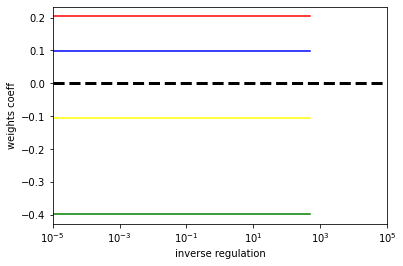

In [1]:
#using panda version 1.4.2
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import make_classification
from sklearn import datasets
from sklearn import tree, model_selection
from sklearn.metrics import r2_score
import matplotlib.pyplot as plt

df=pd.read_csv('50_Startups.csv')
print("Given Data",df)

x=df.iloc[:,0:].values
print(x)
y=df.iloc[:,1].values
print(y)
x_train,x_test,y_train,y_test=\
train_test_split(x,y,
                test_size=0.3,
                random_state=0)
print("splitting the values in train and test set ","\nx train",x_train,"\nx_test",x_test,"y_train",y_train,"\ny_test",y_test)

stdsc = StandardScaler()
X_train_std = stdsc.fit_transform(x_train)
X_test_std = stdsc.transform(x_test)
print(X_test_std,"\n second \n", X_train_std)

lr=LogisticRegression(multi_class='multinomial', solver='lbfgs')
x_train,y_train = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, n_classes=3, random_state=1)
lr.fit(x_train,y_train)
print("training accuracy:",lr.score(x_train,y_train))\



plt.figure()
ax=plt.subplot(111)
colors=['red','blue','green','yellow']
weights,para=[],[]
for i in np.arange(-4,6):
    lr.fit(x_train,y_train)
    weights.append(lr.coef_[1])
    para.append(100*i)
    
weights =np.array(weights)
for column,color in zip(range(weights.shape[1]),colors):
    plt.plot(para,weights[:,column],
             label=df.columns[column],
             color=color)
    

seed=42
kfold = model_selection.KFold(n_splits=10)
model = tree.DecisionTreeRegressor()
scoring = "neg_mean_absolute_error"
results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
print("Mean Absolute Error: ", results.mean())
print("Standard Deviation: ", results.std())
scoring = "neg_mean_squared_error"
results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
print("Mean Squared Error: ", results.mean())
print("Standard Deviation: ", results.std())
scoring = "r2"
results = model_selection.cross_val_score(model, x_train, y_train, cv=kfold, scoring=scoring)
print()
print("R squared val: ", results.mean())
print("Standard Deviation: ", results.std())


plt.axhline(0,color='black',linestyle='--', linewidth=3)
plt.xlim([10**(-5),10**5])
plt.ylabel("weights coeff")
plt.xlabel("inverse regulation")
plt.xscale("log")
plt.show()

